# 1. Datos

## 1.1. Manejo de los archivos IDX

- Descarga los archivos que se encuentran en la siguiente carpeta compartida MNIST: [Enlace Carpeta MNIST](https://universidaddeburgos-my.sharepoint.com/:f:/g/personal/dgarcia1_ubu_es/En7vGMQoS_tBo8fXA5F5dFoBC58TI9sJnWPBKqiUp3AUwQ?e=SmMkb3) 

- Descomprime correctamente cada uno de los archivos ```emnist-balanced-images-idx3-ubyte.gz``` y ```emnist-balanced-labels-idx1-ubyte.gz``` para obtener los datos de las imágenes y su correspondiente etiqueta.

- Comprueba que puedes acceder a las imágenes empleando Python. 
    - El número de imágenes debe coincidir con el número de etiquetas
    - Cada imagen tendrá asignada una etiqueta indexada en el mismo orden en el archivo ```labels```. Cada imagen tiene asignada una etiqueta que se corresponde con un indice (de 0 a 46), que se corresponderá a su vez con un caracter en formato ASCII (representado en la siguiente tabla entre comillas):


In [1]:
from modules.funciones_proporcionadas import carga_data_MNIST
input_path='./MNIST_balanced/'
file_images= 'emnist-balanced-images-idx3-ubyte.gz'
file_labels = 'emnist-balanced-labels-idx1-ubyte.gz'

[images,labels]=carga_data_MNIST(input_path,file_images,file_labels)
print(images.shape)
print(labels.shape)

***********************************
Numero mágico para el archivo de imágenes:
2051
Numero de imágenes:
112800
Numero de filas (imágenes):
28
Numero de columnas (imágenes):
28
***********************************
Numero mágico para el archivo de etiquetas:
2049
Numero de etiquetas:
112800
***********************************
(112800, 28, 28)
(112800,)


# `TAREA 1`

Hasta el momento tenemos los valores de etiqueta obtenidos del archivo `labels`, pero este valor no nos proporciona información directa sobre el caracter que representa ese indice. Para ello tenemos a nuestra disposición un archivo que nos permite realizar esa 'traducción'. Se trata del archivo `claves_ASCII.txt` que se encuentra en la carpeta `MNIST_balanced`. 

Para poder trabajar en adelante con el caracter representado y no con el índice, se **solicita crear una función `crea_diccionario` con la que se obtenga un diccionario en el cual la clave será el indice (del 0 al 46) y el valor será el caracter ASCII que representa ('A', 'B', '0', '1'...)**. La función tendrá como parámetro de entrada un archivo de texto que será procesado convenientemente.

De esta forma, la ejecución de la siguiente celda:

In [2]:
from modules.modules import crea_diccionario
archivo_claves="./MNIST_balanced/claves_ASCII.txt"
caracteres=crea_diccionario(archivo_claves)
print(caracteres)


{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'}


---
## 1.2. Procesado de las imágenes

En las siguientes celdas vamos a ir viendo cual es el contenido de las estructuras de datos obtenidas de la lectura de los archivos `IDX`.

Seleccionamos una de las imágenes y etiqueta que se encuentren pareadas al azar (deben coincidir en el índice):

In [3]:
img = images[87]
eti = labels[87]
print(img)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   2.   3.   2.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   2.   3.   2.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   4.   9.  21.  32.  20.   7.   1.   0.   0.   0.]
 [  0.   0.   0.   5.  18.  31.  18.   5.   0.   0.   0.   2.   4.   4.
    4.   4.   5.   9.  34.  50.  82. 112.  76.  32.   7.   0.   0.   0.]
 [  0.   0.   2.  18.  63. 106.  65.  22.   6.   4.   9.  21.  32.  37.
   37.  37.  39.  51. 115. 139. 172. 202. 153.  77.  20.   2.   0.   0.]
 [  0.   0.   3.  32. 108. 181. 127.  64.  41.  37.  51.  82. 114. 125.
  127. 127. 129. 140. 204. 220. 233. 244. 201. 113.  32.  

### 1.2.1 Muestra una imagen

Empleando las funciones de **skimage** que vimos en anteriores sesiones, podemos cargar y procesar las imágenes:

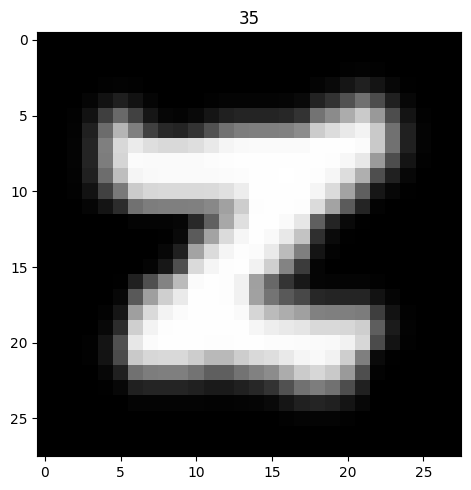

In [4]:
from skimage.io import imshow, imread
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img,cmap='gray')
ax.set_title(eti)
plt.tight_layout()
plt.show()

### 1.2.2 Muestra varias imágenes

Mediante la función `show_images` podemos mostrar varias imágenes y su correspondiente caracter:

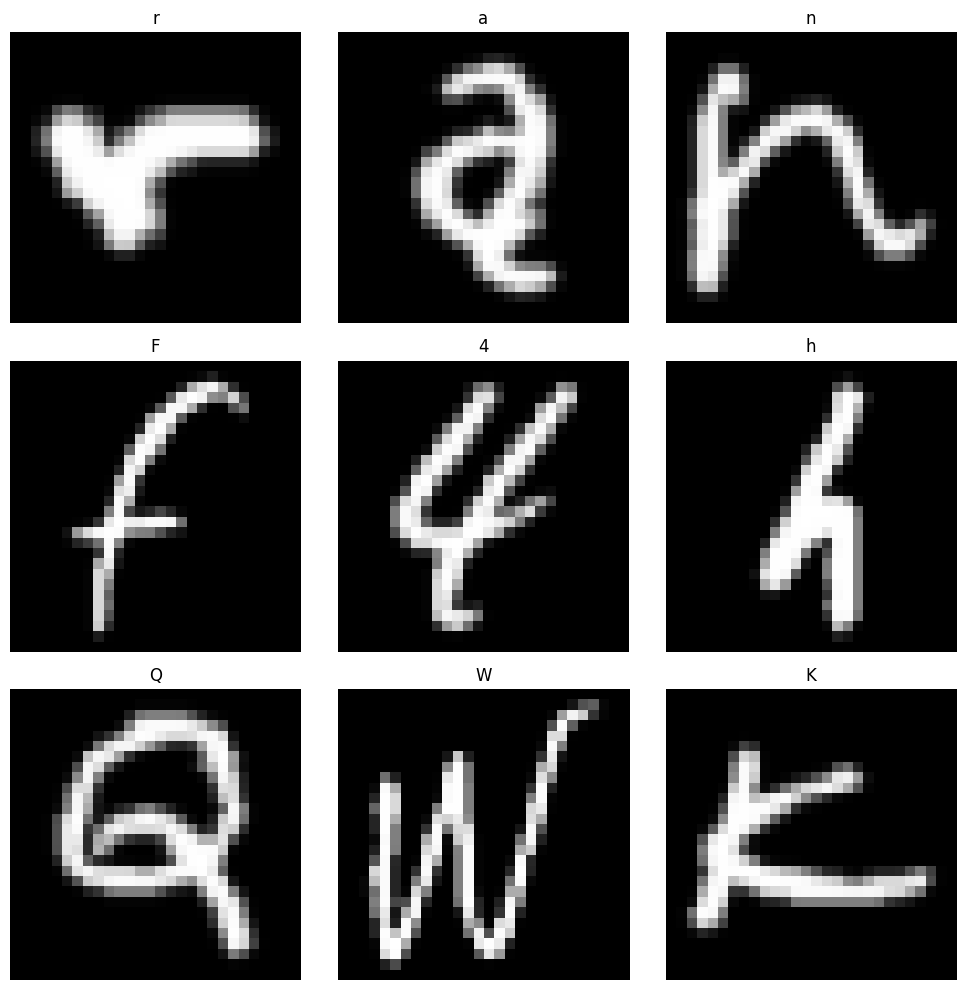

In [5]:
from modules.funciones_proporcionadas import show_images

show_images(images,labels,caracteres,3,3)

### 1.2.4 Modificando el formato de las imágenes:

Para poder trabajar con los datos de las imágenes en las redes neuronales a implementar, tendremos que pasar de datos en dos dimensiones a una única dimensión:

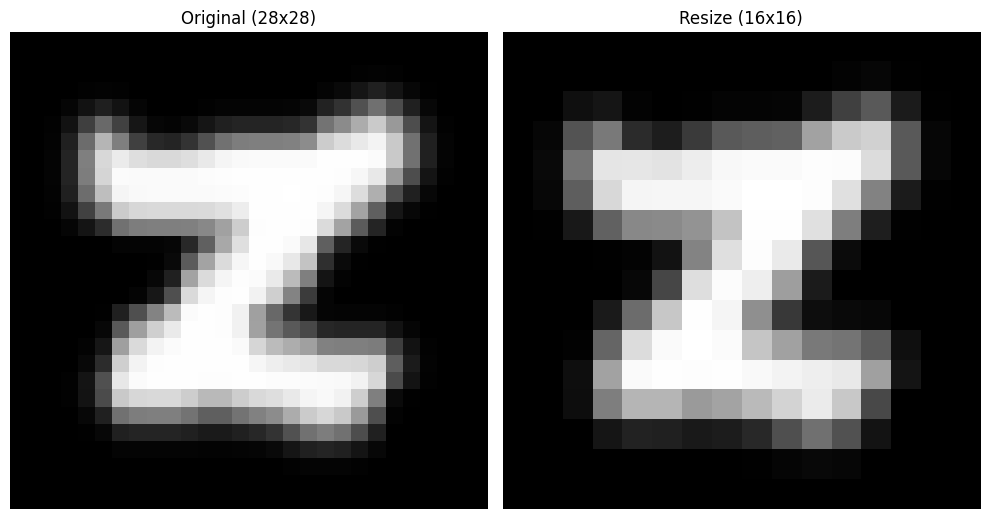

In [6]:
'''
Redimensionar una imagen a 16 x 16
'''

from skimage.transform import resize
import warnings

'''
El Método resize muestra un "warning", 
El Método filterwarnings permite ignorar el "warning" y que no se muestre en pantalla.
''' 
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(ncols=2,figsize=(10, 10))
axes=ax.ravel()

axes[0].imshow(img,cmap='gray')
axes[0].set_title("Original (28x28)")
axes[0].axis("off")


img_mini =  resize(img, (16, 16))
axes[1].imshow(img_mini,cmap='gray')
axes[1].set_title("Resize (16x16)")
axes[1].axis("off")

plt.tight_layout()
plt.show()

# `TAREA 2`
**Implementar una función *get_dataset()* que devuelva $X$ e $y$.** 
- HINT: para incluir todos los datos en un único vector se puede emplear *reshape*.

In [7]:
from modules.modules import getdataset
Ximage, yimage=getdataset(images,labels, caracteres, 16)
print(Ximage.shape,yimage.shape)

(112800, 256) (112800,)


# 2. Construcción y evaluación de un *clasificador de formas*. 


Tal y como ya hemos visto, en **Python** tenemos una librería de minería de datos llamada **Scikit-learn** o **Sklearn**. En el entrenamiento del perceptrón, trabajamos con esta librería puesto que nos permite entrenar muchos tipos de clasificadores, entre ellos, una **red neuronal**.

Para esta práctica, por el momento, solamente tenemos un conjunto de imágenes, por lo que unicamente disponemos un conjunto de datos. 

## 2.1 Creación de los conjuntos de datos

Para comprobar el funcionamiento de nuestro clasificador, necesitamos un conjunto de datos de entrenamiento que nos permita configurar el percetrón. Es decir, tenemos que descomponer el conjunto de datos en dos subconjuntos: 
* entrenamiento

* test.

Para este trabajo, vamos a implementar una *partición* de **70/30**, para *entrenamiento/test*.

El método ```train_test_split``` del módulo ```sklearn.model_selection``` permite dividir un conjunto de datos en dos partes, una para entrenar el clasificador, y otra para evaluar su funcionamiento (test).

<div class="alert alert-info"> <b>from</b> sklearn.model_selection <b>import</b> train_test_split<br>
    <b>help </b>(train_test_split)<br></div>

**Importante:** El uso de la propiedad de *estratificación* (```stratify```) como flag en el método ```train_test_split``` permite que haya la misma proporción de clases en entrenamiento que en test.

Para ello emplearemos una llamada al método `train_test_split` de la siguiente manera:

```Python
from sklearn.model_selection import train_test_split

'''
El par X_train, y_train son los atributos y clases del conjunto de entrenamiento (70% de los ejemplos)
El par X_test, y_test son los atributos y clases del conjunto de test (30% de los ejemplos)

stratify (estratificar) significa que se quiere que haya la misma proporcion de cada una de las clases
tanto en entrenamiento como en test, es decir, no es una partición completamente aleatoria.
'''
X_train, X_test, y_train, y_test = train_test_split(Ximage, yimage, stratify=yimage, train_size = 0.7 )


```

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Ximage, yimage, stratify=yimage, train_size = 0.7 )

# 3. Clasificación con perceptrón simple

El perceptron simple que tenemos implementado de la sesión anterior, unicamente es capaz de clasificar dos clases a la vez.

Además, tal cual hemos realizado nuestra implementación, las clases serán binarias, no nombres.

Veamos un ejemplo:

In [9]:
'''
Uso de la máscara booleana 
- Seleccionar solo los datos que cumplan un criterio
- convertir un array de algún tipo en un array de 0s y 1s, con 1s donde se cumple el criterio

'''
import numpy as np 

a = np.array([1,2,3,4,5,6])
mascara = a < 4

print(mascara)
print(a[mascara])

# astype cambia al tipo que se quiera
print(mascara.astype(int)) # los True se convierten en 1s los False en 0s


[ True  True  True False False False]
[1 2 3]
[1 1 1 0 0 0]


En el caso de las imágenes con las que estamos trabajando, el planteamiento es similar, solo que tendremos que seleccionar un par de clases. Por ejemplo:

```Python 
'''
Seleccionamos sólo los casos en los que la clase sea "A" o "3" (por ejemplo)

X_2C de todos los ejemplos de X solo se seleccionan aquellos donde la clase es "A" o "3"
y_2C de todos los ejemplos de y solo se seleccionan aquellos donde la clase es "A" o "3"
'''
X_2C = Ximage[((yimage == 'A') | (yimage == '3'))]
y_2C = yimage[((yimage == 'A') | (yimage == '3'))

# Tenemos solo dos clases, pero las etiquetas siguen siendo cadenas de texto
print(X_2C.shape)
print(X_2C)
print(y_2C.shape)
print(y_2C)

```

debemos obtener:

```
(4800, 256)
[[5.57877143e-14 6.62299868e-08 1.92427193e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
(4800,)
['3' '3' '3' ... 'A' 'A' 'A']

```

In [10]:
'''
Seleccionamos sólo los casos en los que la clase sea "A" o "3" (por ejemplo)

X_2C de todos los ejemplos de X solo se seleccionan aquellos donde la clase es "A" o "3"
y_2C de todos los ejemplos de y solo se seleccionan aquellos donde la clase es "A" o "3"
'''
X_2C = Ximage[((yimage == 'A') | (yimage == '3'))]
y_2C = yimage[((yimage == 'A') | (yimage == '3'))]

# Tenemos solo dos clases, pero las etiquetas siguen siendo cadenas de texto
print(X_2C.shape)
print(X_2C)
print(y_2C.shape)
print(y_2C)

(4800, 256)
[[5.5787714e-14 6.6229987e-08 1.9242719e-03 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
(4800,)
['3' '3' '3' ... 'A' 'A' 'A']


In [11]:
from sklearn.model_selection import train_test_split
y_2C_num = (y_2C == 'A').astype(int)
X2C_train, X2C_test, y2C_train, y2C_test = train_test_split(X_2C, y_2C_num, stratify=y_2C_num, train_size = 0.7 )

# `TAREA 3`

Incluye las funciones `entrena_perceptron`, `predice` y `evalua` en el archivo donde vayas a organizar las funciones implementadas y comprueba su funcionamiento con los datos de entrenamiento y test 

```python
from modules import entrena_perceptron,evalua #Tendras que ajustar esta importación de acuerdo a tu archivo de funciones.
z = 0.0     # umbral
eta = 0.1   # learning rate
t = 50      # número de iteraciones

weights, errors = entrena_perceptron(X2C_train, y2C_train, z, eta, t,funcion_escalon)
y_pred_2C_own=predice(weights,X2C_test,z,funcion_escalon)
porcentaje_acierto_perceptron_own=evalua(y2C_test, y_pred_2C_own)
print(porcentaje_acierto_perceptron_own)

```

Debemos obtener un valor alrededor de 0.99

De la misma forma podemos emplear las funciones que nos permiten crear un perceptrón en `sklearn`:

```Python
from sklearn.linear_model import Perceptron
from modules import evalua #Tendras que ajustar esta importación de acuerdo a tu archivo de funciones.

clf = Perceptron(random_state=None, eta0= 0.1, shuffle=True, fit_intercept=True)
clf.fit(X2C_train, y2C_train)
y_pred_2C_sk = clf.predict(X2C_test)

porcentaje_acierto_perceptron_sk=evalua(y2C_test, y_pred_2C_sk)
print(porcentaje_acierto_perceptron_sk)
```

Obtendremos un valor similar al obtenido por el perceptrón propio.

In [12]:
from modules.modules import entrena_perceptron,evalua, predice #Tendras que ajustar esta importación de acuerdo a tu archivo de funciones.
from modules.funciones_proporcionadas import funcion_escalon
z = 0.0     # umbral
eta = 0.1   # learning rate
t = 50      # número de iteraciones

weights, errors = entrena_perceptron(X2C_train, y2C_train, z, eta, t,funcion_escalon)
y_pred_2C_own=predice(weights,X2C_test,z,funcion_escalon)
porcentaje_acierto_perceptron_own=evalua(y2C_test, y_pred_2C_own)
print(porcentaje_acierto_perceptron_own)

99.375


## Punto 4. Elementos para la valoración de la predicción.

### Matriz de confusión

En este punto vamos a introducir una forma de presentar los resultados obtenidos en la clasificación de clases a partir de la matriz de confusión.

<div class="alert alert-info"> <b>from</b> sklearn <b>import</b> metrics<br>
    <b>help </b>(metrics.confusion_matrix)<br>
    <b>help </b>(metrics.ConfusionMatrixDisplay)<br></div>
    

    
Los valores de la diagonal principal se corresponden con los valores estimados de forma correcta por el modelo. El resto de datos representan los casos en los que el modelo *«se ha equivocado»*.

<img style="float:center" width="60%" src="pics/matrix_confusion_n2.jpg">

In [13]:
from sklearn.linear_model import Perceptron
from modules.modules import evalua #Tendras que ajustar esta importación de acuerdo a tu archivo de funciones.

clf = Perceptron(random_state=None, eta0= 0.1, shuffle=True, fit_intercept=True)
clf.fit(X2C_train, y2C_train)
y_pred_2C_sk = clf.predict(X2C_test)

porcentaje_acierto_perceptron_sk=evalua(y2C_test, y_pred_2C_sk)
print(porcentaje_acierto_perceptron_sk)

99.44444444444444


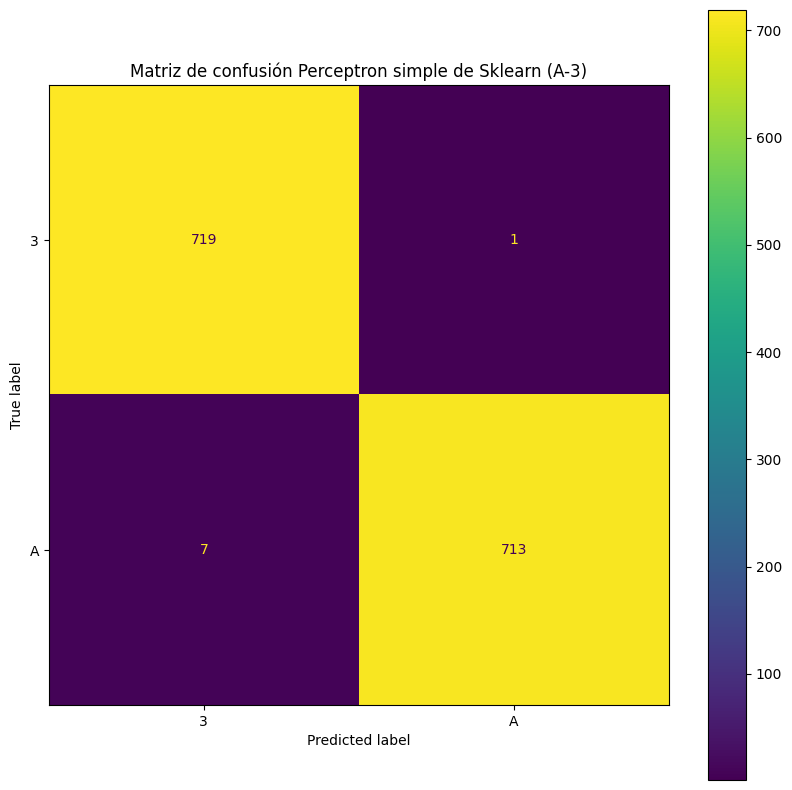

In [14]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np 

labels=np.unique(y2C_test)

conf_mat = metrics.confusion_matrix(y2C_test, y_pred_2C_sk,labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ["3" , "A"])
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.title("Matriz de confusión Perceptron simple de Sklearn (A-3)")
plt.show()


### Métricas: 

A partir de la matriz de confusión se pueden derivar varias métricas. Estas son las tres más importantes:

- **Exactitud (accuracy)**: Porcentaje de predicciones correctas. Se corresponde con el valor obtenido de nuestra función `evalua`.
- **Precisión (precision)**: Porcentaje de predicciones positivas correctas.
- **Sensibilidad (recall)** representa la tasa de verdaderos positivos. Es la proporción entre los casos positivos bien clasificados por el modelo, respecto al total de positivos. 



In [15]:
from sklearn import metrics

accuracy=metrics.accuracy_score(y2C_test, y_pred_2C_own)
print("Exactitud: " + str(accuracy))

precision =metrics.precision_score(y2C_test, y_pred_2C_own,average=None) 
#Incluimos el parametro average=None para que calcule la métrica de precisión en las dos clases
print("Precisión: " + str(precision))

sensibilidad =metrics.recall_score(y2C_test, y_pred_2C_own,average=None)
print("Sensibilidad: " + str(sensibilidad))

Exactitud: 0.99375
Precisión: [0.99306519 0.99443672]
Sensibilidad: [0.99444444 0.99305556]


In [16]:
from sklearn import metrics

accuracy=metrics.accuracy_score(y2C_test, y_pred_2C_sk)
print("Exactitud: " + str(accuracy))

precision =metrics.precision_score(y2C_test, y_pred_2C_sk,average=None) 
#Incluimos el parametro average=None para que calcule la métrica de precisión en las dos clases
print("Precisión: " + str(precision))

sensibilidad =metrics.recall_score(y2C_test, y_pred_2C_sk,average=None)
print("Sensibilidad: " + str(sensibilidad))


Exactitud: 0.9944444444444445
Precisión: [0.99035813 0.99859944]
Sensibilidad: [0.99861111 0.99027778]


# `TAREA 4`

- ¿Que ocurre con la matriz de confusión y las métricas que se obtienen de la función `evalua` cuando ejecutamos de forma repetida el entrenamiento y predicción de cada perceptrón, por ejemplo 10 veces?

```Python
from modules import entrena_perceptron,evalua #Tendras que ajustar esta importación de acuerdo a tu archivo de funciones.
from sklearn.linear_model import Perceptron

z = 0.0     # umbral
eta = 0.1   # learning rate
t = 50      # número de iteraciones

for i in range(10):
    weights, errors = entrena_perceptron(X2C_train, y2C_train, z, eta, t,funcion_escalon)
    y_pred_2C_own=predice(weights,X2C_test,z,funcion_escalon)
    clf = Perceptron(random_state=None, eta0= 0.1, shuffle=True, fit_intercept=True)
    clf.fit(X2C_train, y2C_train)
    y_pred_2C_sk = clf.predict(X2C_test)

    print("----------Round " + str(i) + "------------------")
    accuracy=metrics.accuracy_score(y2C_test, y_pred_2C_own)
    print("Exactitud_own: " + str(accuracy))
    
    precision =metrics.precision_score(y2C_test, y_pred_2C_own,average=None) 
    #Incluimos el parametro average=None para que calcule la métrica de precisión en las dos clases
    print("Precisión_own: " + str(precision))
    
    sensibilidad =metrics.recall_score(y2C_test, y_pred_2C_own,average=None)
    print("Sensibilidad_own: " + str(sensibilidad))

    accuracy=metrics.accuracy_score(y2C_test, y_pred_2C_sk)
    print("Exactitud_sk: " + str(accuracy))

    precision =metrics.precision_score(y2C_test, y_pred_2C_sk,average=None) 
    print("Precisión_sk: " + str(precision))

    sensibilidad =metrics.recall_score(y2C_test, y_pred_2C_sk,average=None)
    print("Sensibilidad_sk: " + str(sensibilidad))
    
    
```

In [17]:
for i in range(10):
    weights, errors = entrena_perceptron(X2C_train, y2C_train, z, eta, t,funcion_escalon)
    y_pred_2C_own=predice(weights,X2C_test,z,funcion_escalon)
    clf = Perceptron(random_state=None, eta0= 0.1, shuffle=True, fit_intercept=True)
    clf.fit(X2C_train, y2C_train)
    y_pred_2C_sk = clf.predict(X2C_test)

    print("----------Round " + str(i) + "------------------")
    accuracy=metrics.accuracy_score(y2C_test, y_pred_2C_own)
    print("Exactitud_own: " + str(accuracy))

    precision =metrics.precision_score(y2C_test, y_pred_2C_own,average=None) 
    #Incluimos el parametro average=None para que calcule la métrica de precisión en las dos clases
    print("Precisión_own: " + str(precision))

    sensibilidad =metrics.recall_score(y2C_test, y_pred_2C_own,average=None)
    print("Sensibilidad_own: " + str(sensibilidad))

    accuracy=metrics.accuracy_score(y2C_test, y_pred_2C_sk)
    print("Exactitud_sk: " + str(accuracy))

    precision =metrics.precision_score(y2C_test, y_pred_2C_sk,average=None) 
    print("Precisión_sk: " + str(precision))

    sensibilidad =metrics.recall_score(y2C_test, y_pred_2C_sk,average=None)
    print("Sensibilidad_sk: " + str(sensibilidad))

----------Round 0------------------
Exactitud_own: 0.99375
Precisión_own: [0.99306519 0.99443672]
Sensibilidad_own: [0.99444444 0.99305556]
Exactitud_sk: 0.9965277777777778
Precisión_sk: [0.9944675 0.9986053]
Sensibilidad_sk: [0.99861111 0.99444444]
----------Round 1------------------
Exactitud_own: 0.99375
Precisión_own: [0.99306519 0.99443672]
Sensibilidad_own: [0.99444444 0.99305556]
Exactitud_sk: 0.99375
Precisión_sk: [0.99443672 0.99306519]
Sensibilidad_sk: [0.99305556 0.99444444]
----------Round 2------------------
Exactitud_own: 0.99375
Precisión_own: [0.99306519 0.99443672]
Sensibilidad_own: [0.99444444 0.99305556]
Exactitud_sk: 0.9930555555555556
Precisión_sk: [0.99033149 0.99581006]
Sensibilidad_sk: [0.99583333 0.99027778]
----------Round 3------------------
Exactitud_own: 0.99375
Precisión_own: [0.99306519 0.99443672]
Sensibilidad_own: [0.99444444 0.99305556]
Exactitud_sk: 0.9965277777777778
Precisión_sk: [0.99583911 0.99721836]
Sensibilidad_sk: [0.99722222 0.99583333]
-----

cuando ejecutas el modelo varias veces, es normal que haya pequeñas variaciones en los resultados. Esto pasa porque los datos pueden cambiar un poco, el modelo se inicializa de forma aleatoria cada vez y el proceso de optimización puede dar diferentes resultados.

# `TAREA 5`

- Se solicita analizar la matriz de confusión y sus correspondientes métricas para todos los diferentes pares de imágenes empleando el perceptrón de sklearn. Por ejemplo:
    * 0 - 1
    * 0 - 2
    * 0 - 3
    * ...
    * A - 0
    * A - 1
    * ...

**Importante**: Implementa las funciones necesarias para que se automatice el proceso.


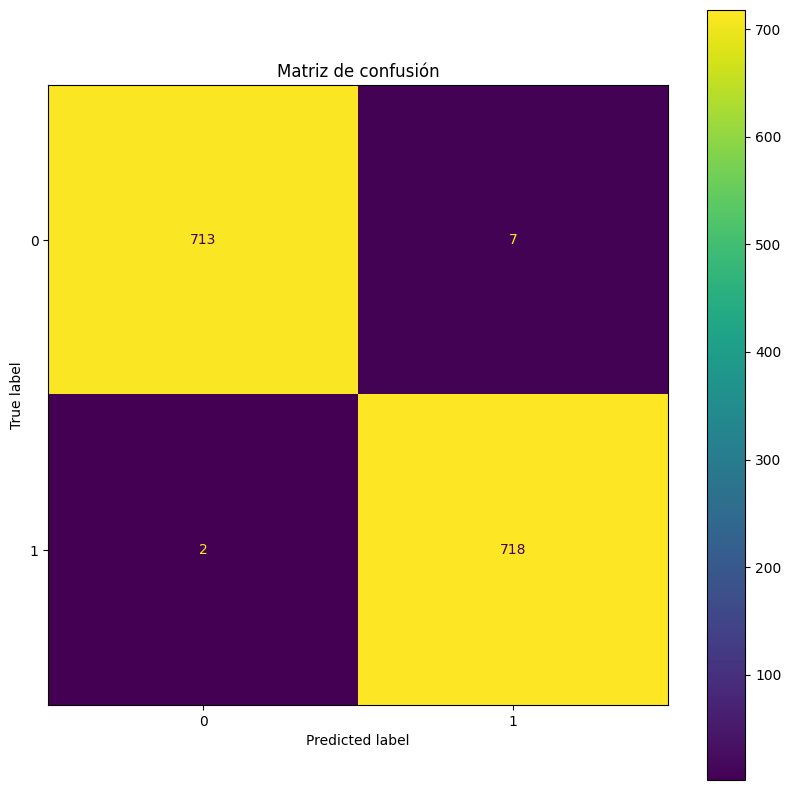

----------Modelo sklearn----------
Exactitud_sk:0.99375
Precisión_sk:[0.9972028  0.99034483]
Sensibilidad_sk:[0.99027778 0.99722222]


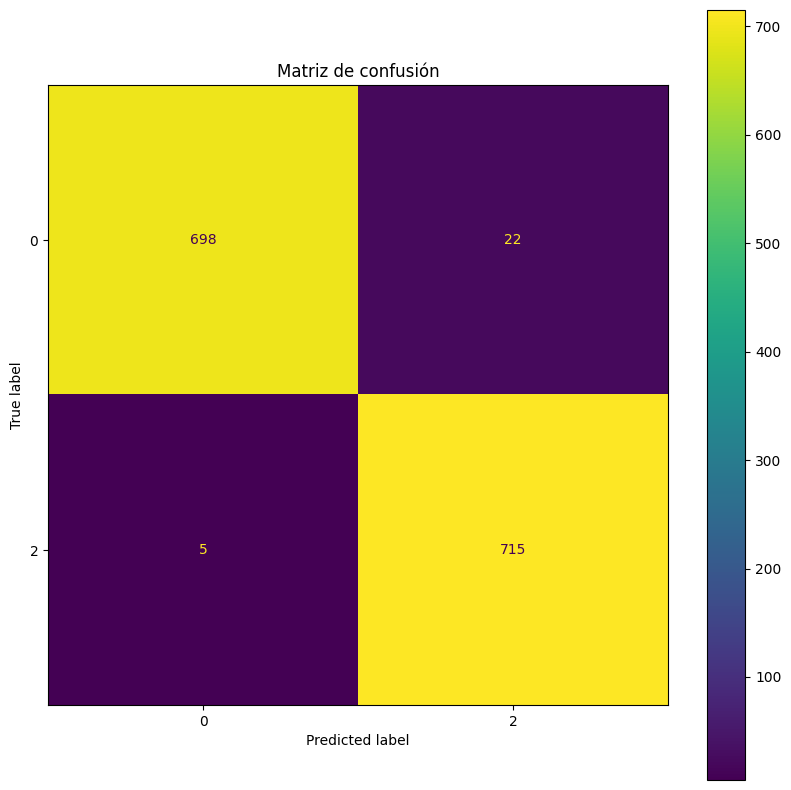

----------Modelo sklearn----------
Exactitud_sk:0.98125
Precisión_sk:[0.99288762 0.97014925]
Sensibilidad_sk:[0.96944444 0.99305556]


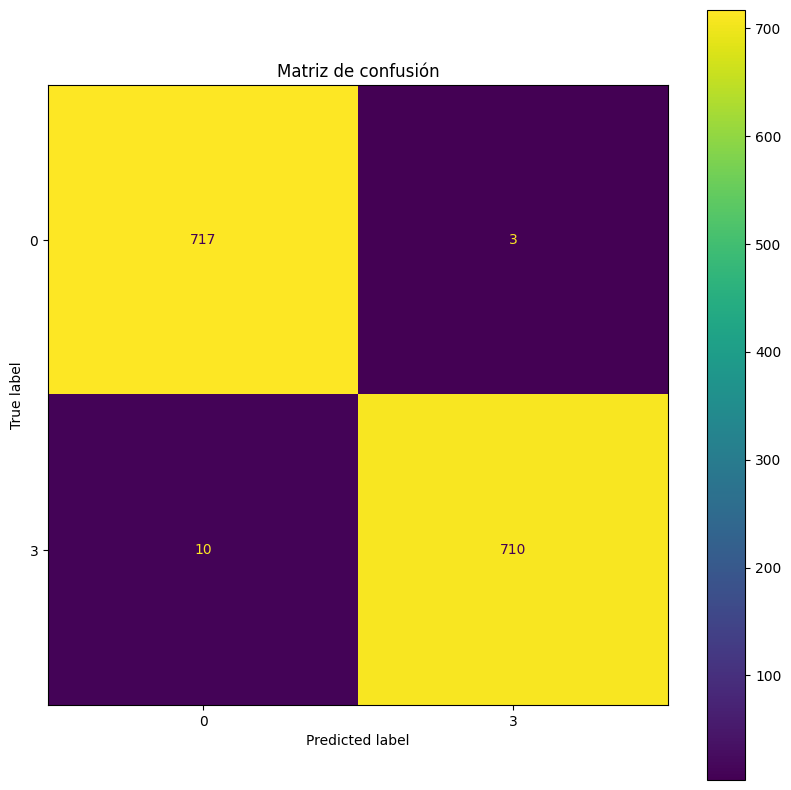

----------Modelo sklearn----------
Exactitud_sk:0.9909722222222223
Precisión_sk:[0.98624484 0.99579243]
Sensibilidad_sk:[0.99583333 0.98611111]


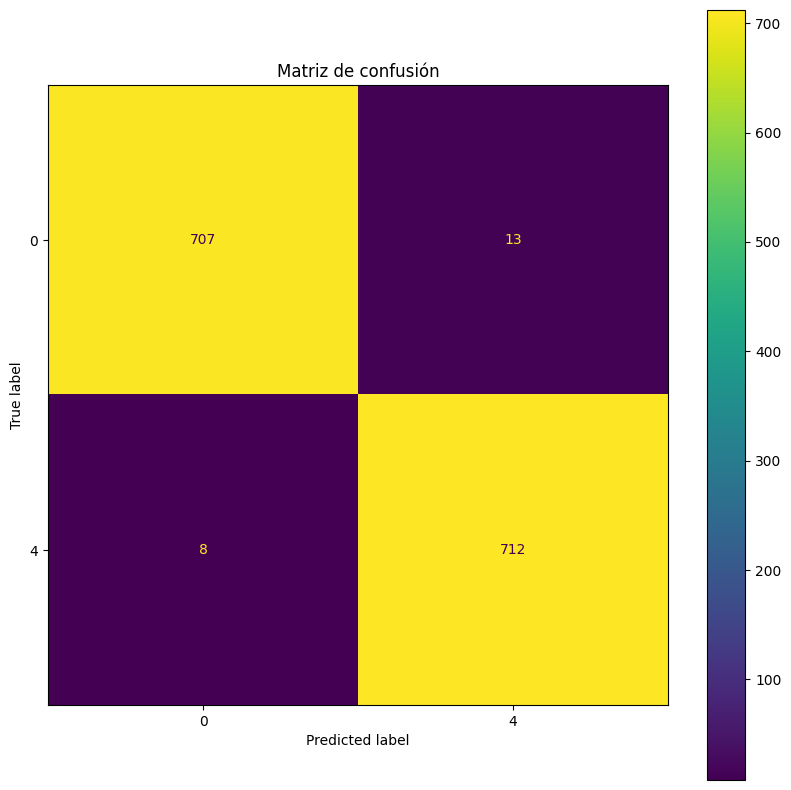

----------Modelo sklearn----------
Exactitud_sk:0.9854166666666667
Precisión_sk:[0.98881119 0.98206897]
Sensibilidad_sk:[0.98194444 0.98888889]


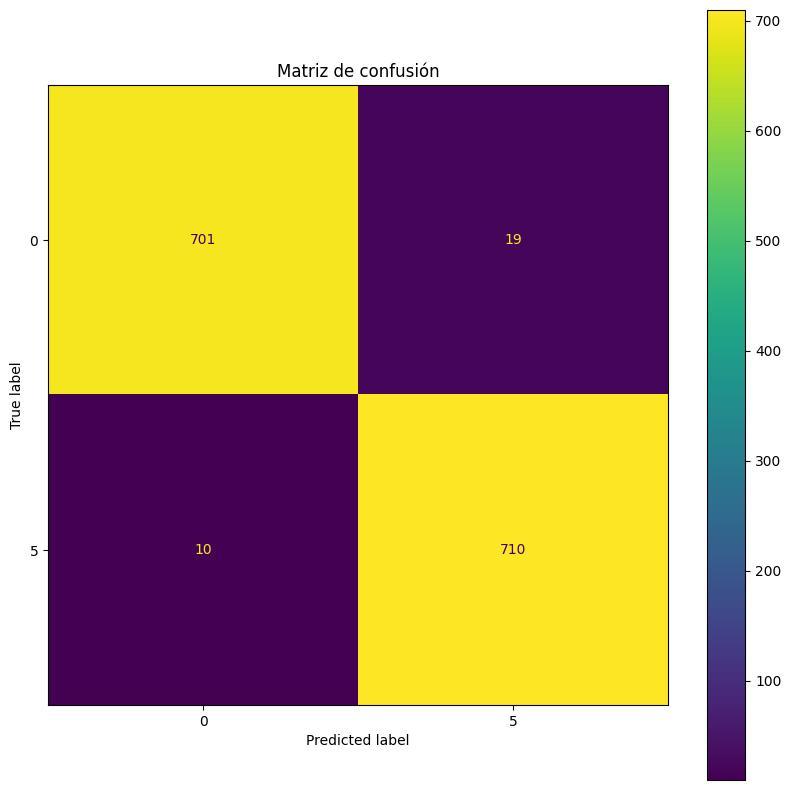

----------Modelo sklearn----------
Exactitud_sk:0.9798611111111111
Precisión_sk:[0.9859353 0.9739369]
Sensibilidad_sk:[0.97361111 0.98611111]


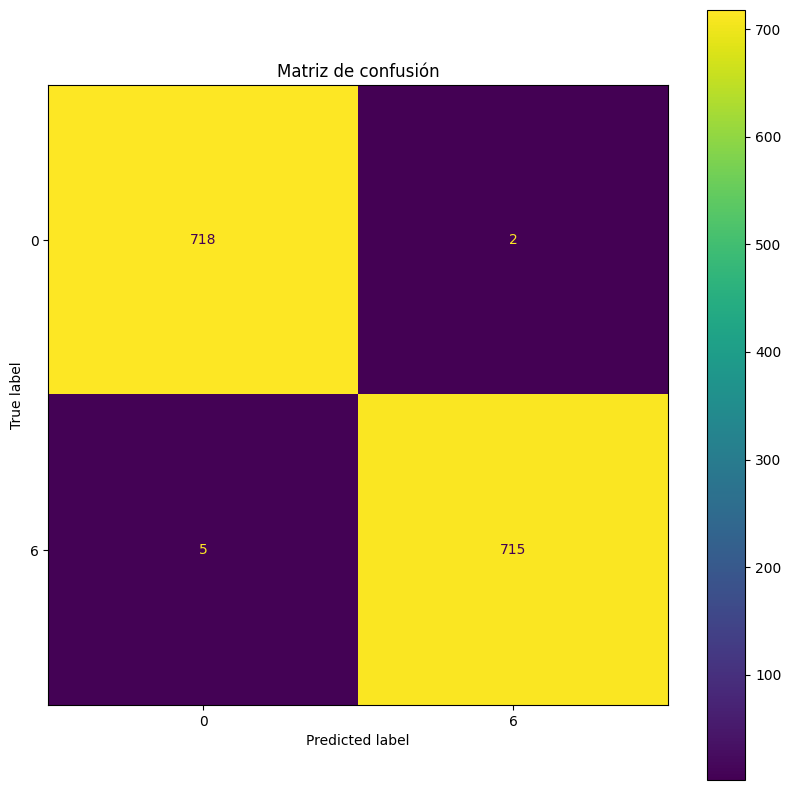

----------Modelo sklearn----------
Exactitud_sk:0.9951388888888889
Precisión_sk:[0.99308437 0.9972106 ]
Sensibilidad_sk:[0.99722222 0.99305556]


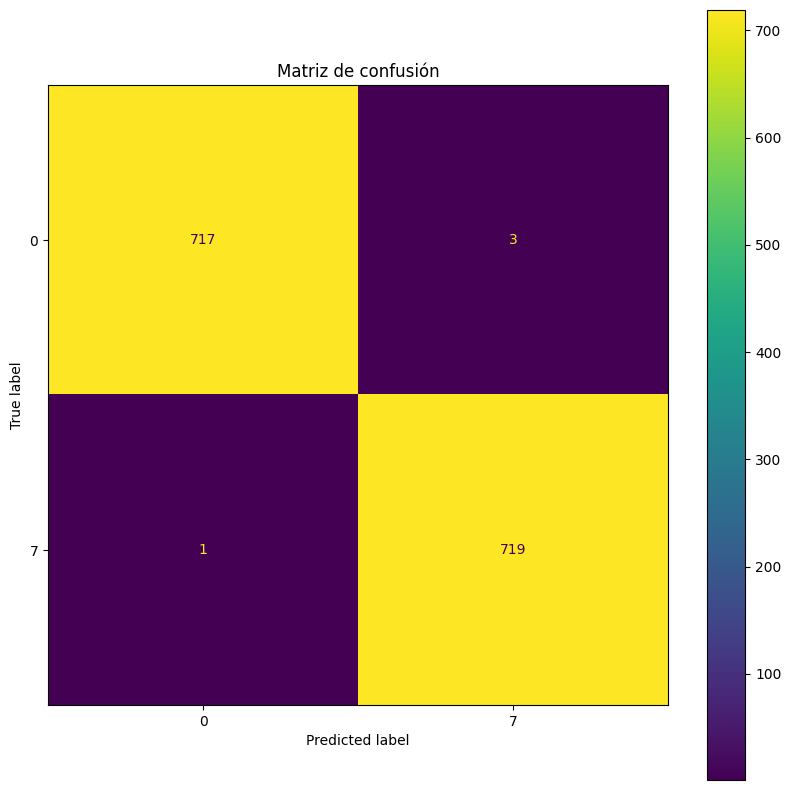

----------Modelo sklearn----------
Exactitud_sk:0.9972222222222222
Precisión_sk:[0.99860724 0.99584488]
Sensibilidad_sk:[0.99583333 0.99861111]


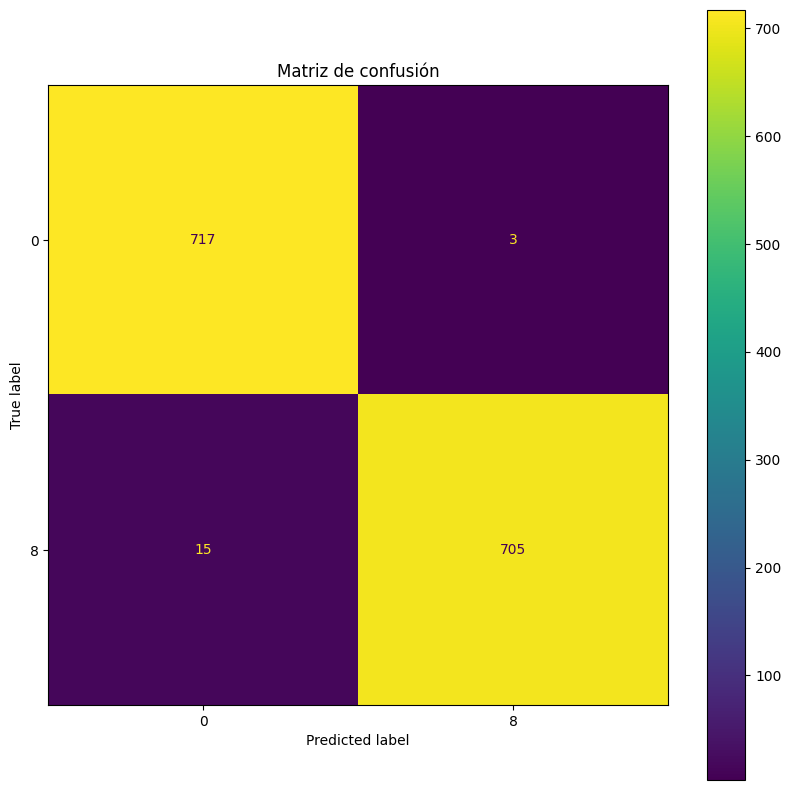

----------Modelo sklearn----------
Exactitud_sk:0.9875
Precisión_sk:[0.9795082  0.99576271]
Sensibilidad_sk:[0.99583333 0.97916667]


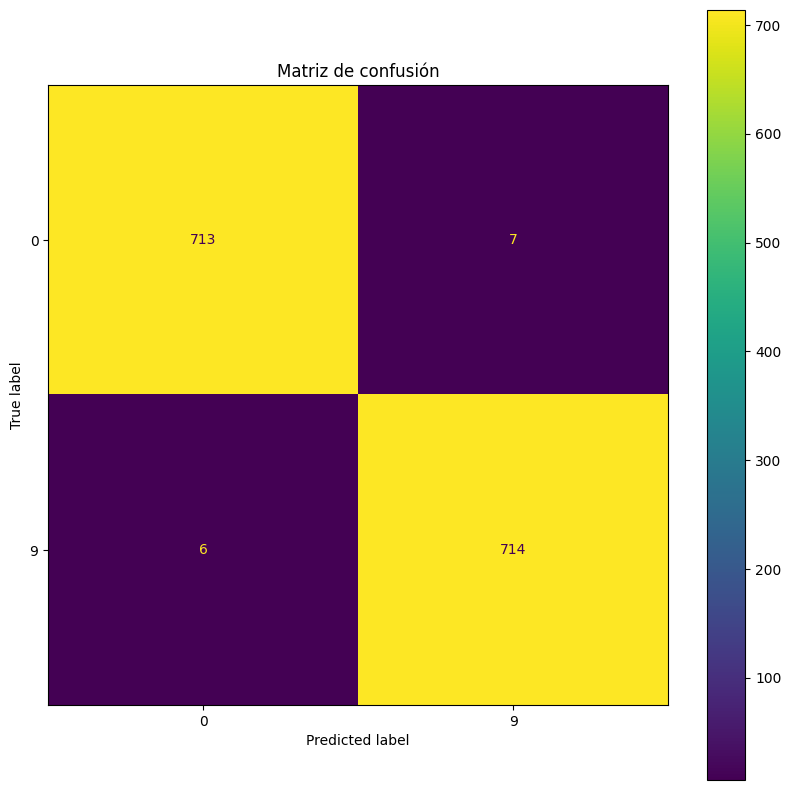

----------Modelo sklearn----------
Exactitud_sk:0.9909722222222223
Precisión_sk:[0.99165508 0.99029126]
Sensibilidad_sk:[0.99027778 0.99166667]


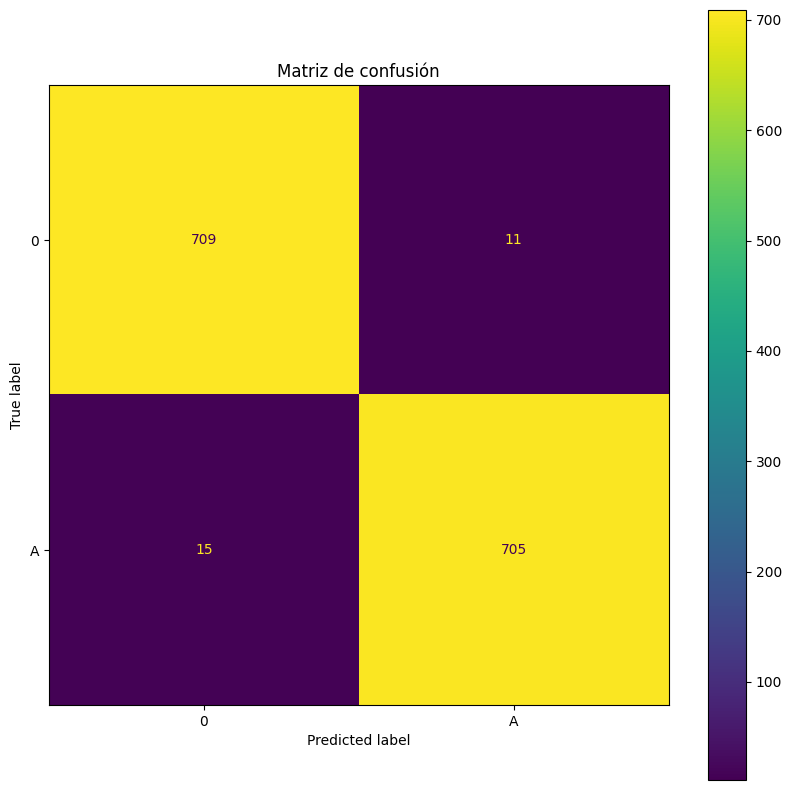

----------Modelo sklearn----------
Exactitud_sk:0.9819444444444444
Precisión_sk:[0.97928177 0.98463687]
Sensibilidad_sk:[0.98472222 0.97916667]


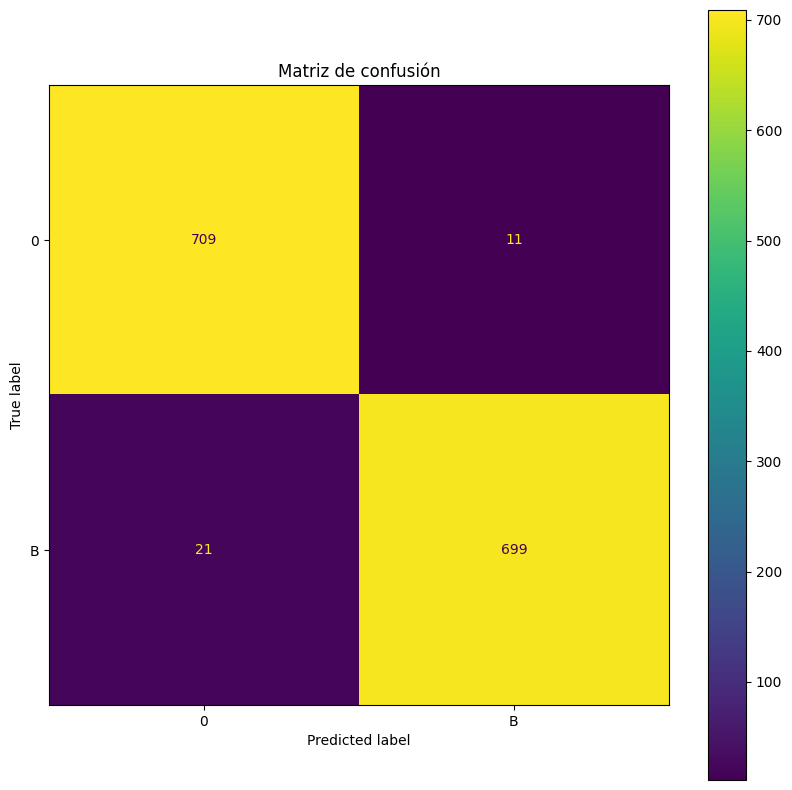

----------Modelo sklearn----------
Exactitud_sk:0.9777777777777777
Precisión_sk:[0.97123288 0.98450704]
Sensibilidad_sk:[0.98472222 0.97083333]


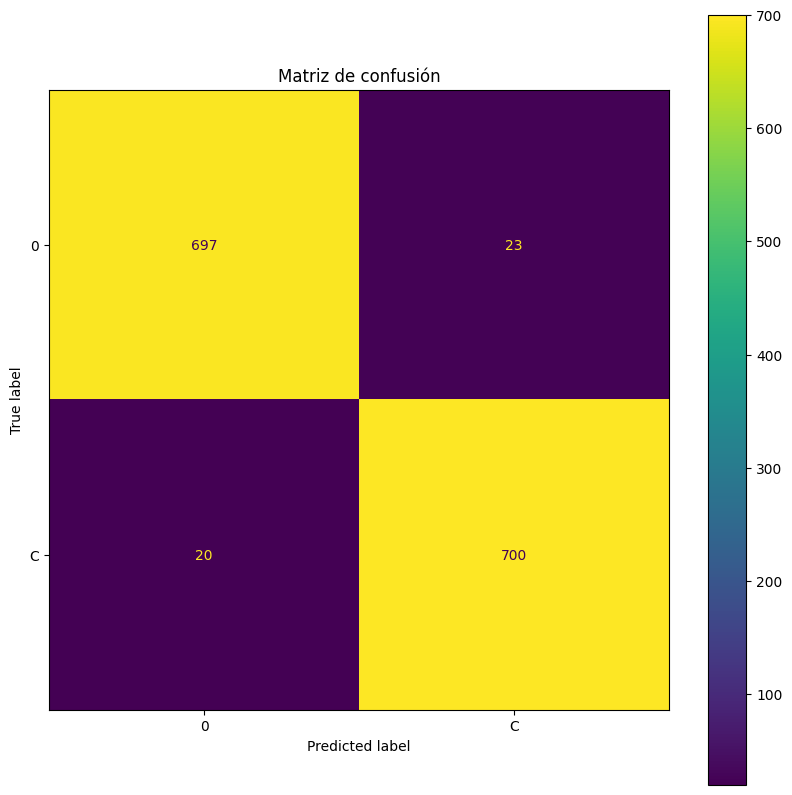

----------Modelo sklearn----------
Exactitud_sk:0.9701388888888889
Precisión_sk:[0.972106   0.96818811]
Sensibilidad_sk:[0.96805556 0.97222222]


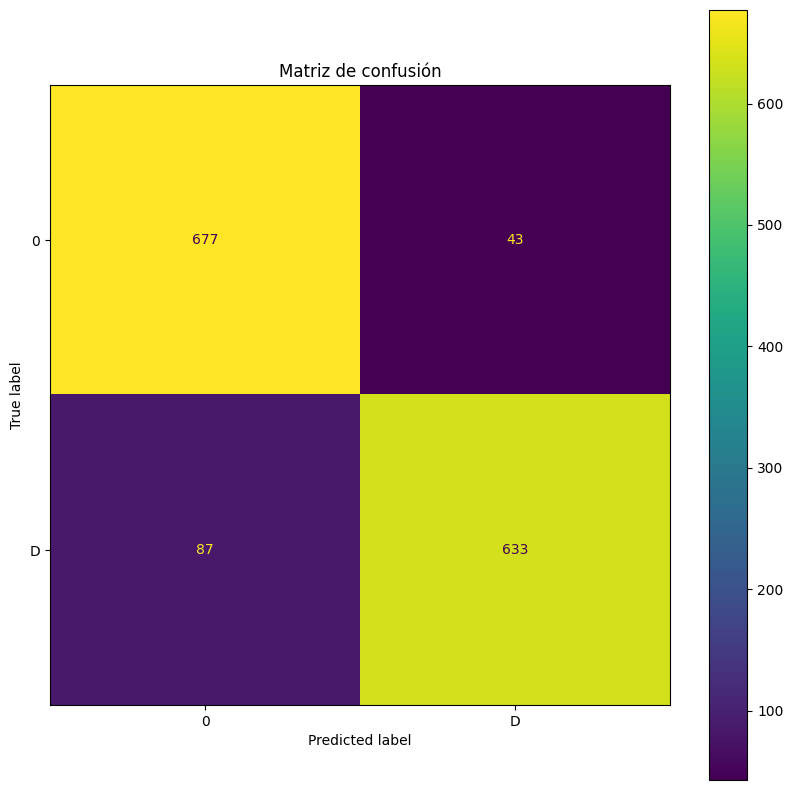

----------Modelo sklearn----------
Exactitud_sk:0.9097222222222222
Precisión_sk:[0.88612565 0.93639053]
Sensibilidad_sk:[0.94027778 0.87916667]


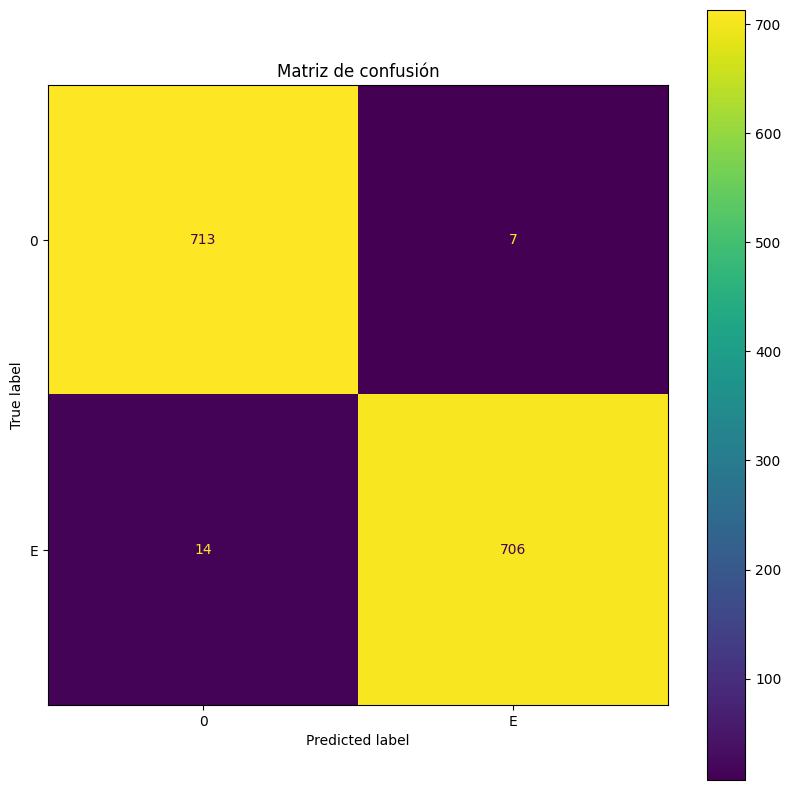

----------Modelo sklearn----------
Exactitud_sk:0.9854166666666667
Precisión_sk:[0.98074278 0.99018233]
Sensibilidad_sk:[0.99027778 0.98055556]


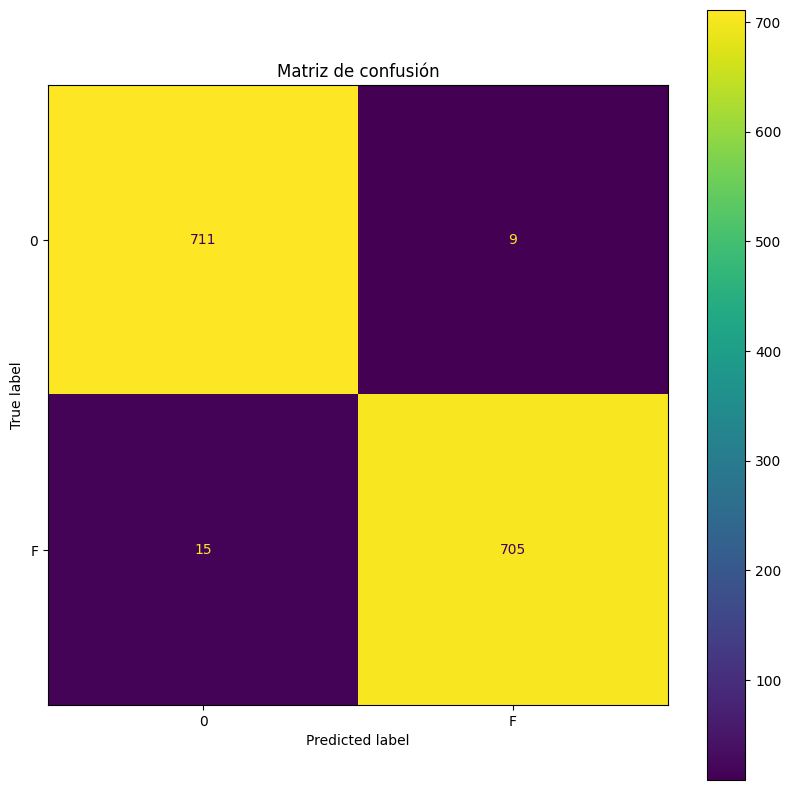

----------Modelo sklearn----------
Exactitud_sk:0.9833333333333333
Precisión_sk:[0.97933884 0.98739496]
Sensibilidad_sk:[0.9875     0.97916667]


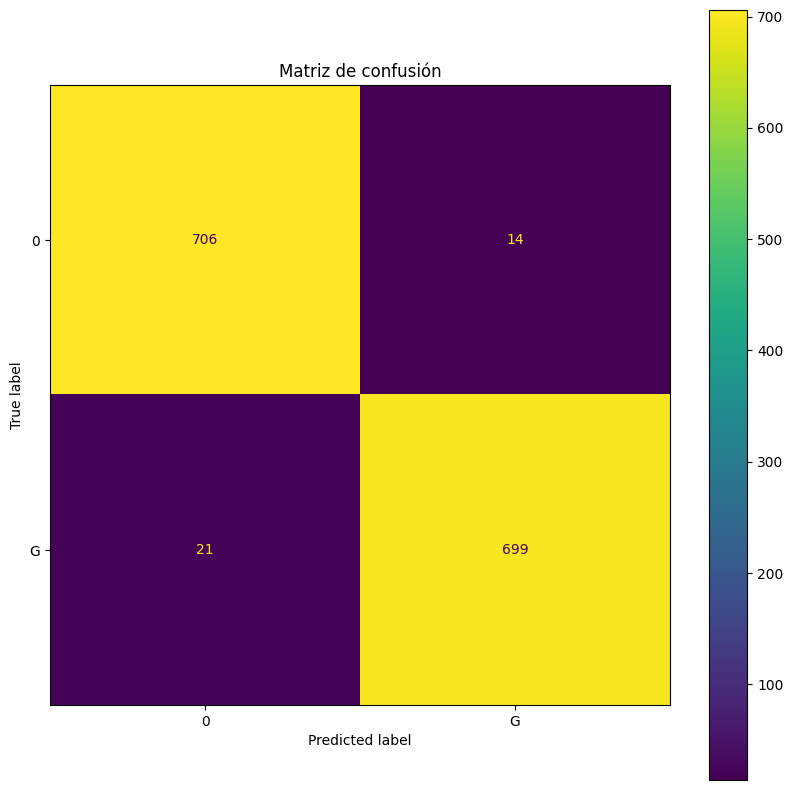

----------Modelo sklearn----------
Exactitud_sk:0.9756944444444444
Precisión_sk:[0.97111417 0.98036466]
Sensibilidad_sk:[0.98055556 0.97083333]


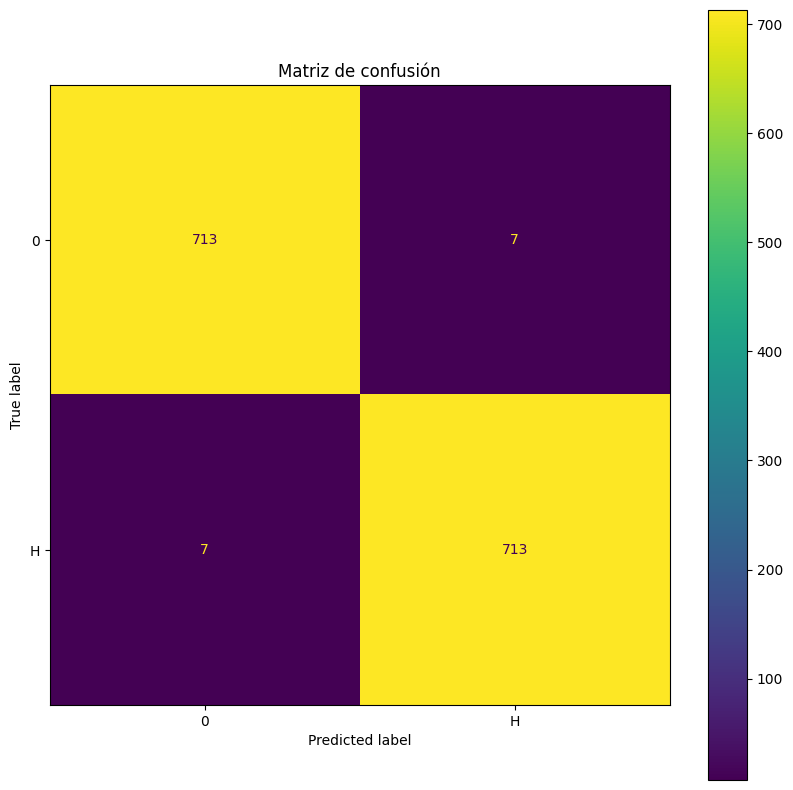

----------Modelo sklearn----------
Exactitud_sk:0.9902777777777778
Precisión_sk:[0.99027778 0.99027778]
Sensibilidad_sk:[0.99027778 0.99027778]


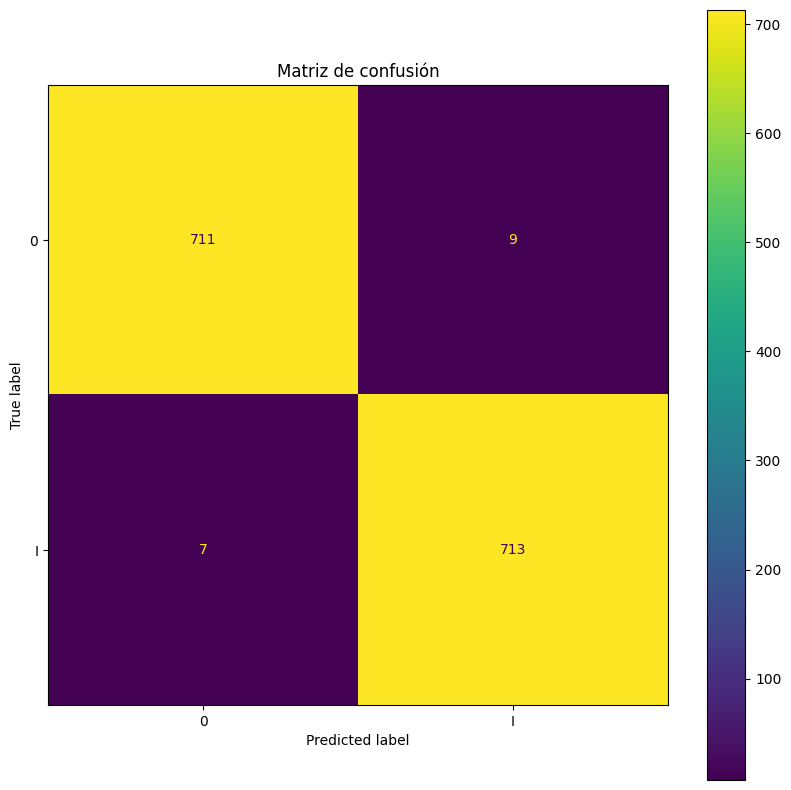

----------Modelo sklearn----------
Exactitud_sk:0.9888888888888889
Precisión_sk:[0.9902507  0.98753463]
Sensibilidad_sk:[0.9875     0.99027778]


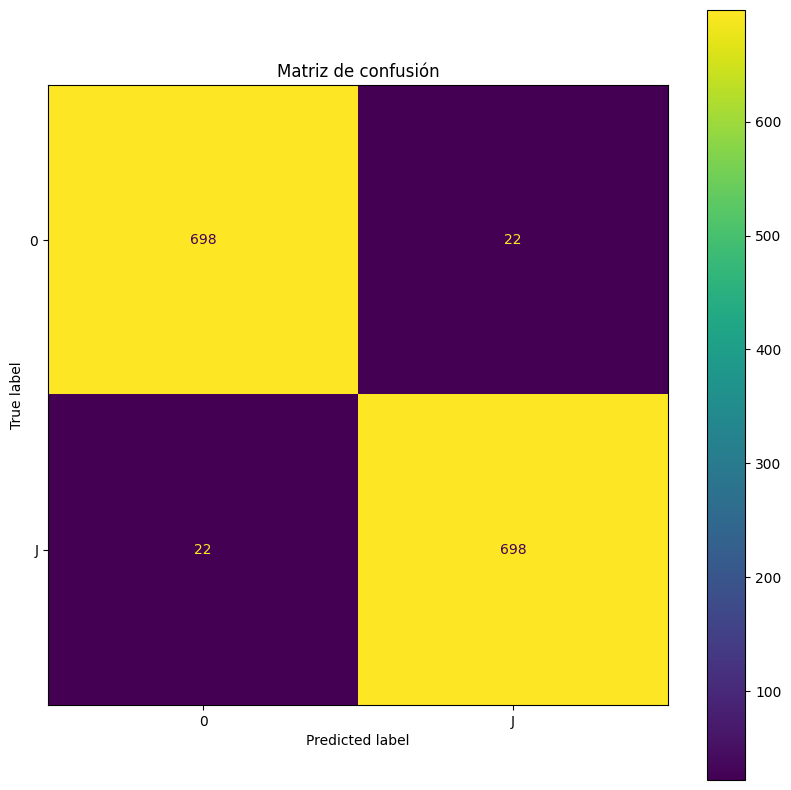

----------Modelo sklearn----------
Exactitud_sk:0.9694444444444444
Precisión_sk:[0.96944444 0.96944444]
Sensibilidad_sk:[0.96944444 0.96944444]


KeyboardInterrupt: 

In [18]:
from sklearn.linear_model import Perceptron
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
#clases unicas

# Iteración sobre todos los pares de clases (incluyendo la clase consigo misma)
for i in caracteres.items():
    for j in caracteres.items():
        if i[0]<j[0]:
            # Filtramos
            X_2C = Ximage[((yimage == i[1]) | (yimage == j[1]))]
            y_2C = yimage[((yimage == i[1]) | (yimage == j[1]))]
            y_2C_num = (y_2C == i[1]).astype(int)
            
            X2C_train, X2C_test, y2C_train, y2C_test = train_test_split(X_2C, y_2C_num, stratify=y_2C_num, train_size = 0.7 )
            # Entrenamiento del perceptrón sklearn
            clf = Perceptron(random_state=None, eta0=eta, shuffle=True, fit_intercept=True)
            clf.fit(X2C_train, y2C_train)
            y_pred_sk = clf.predict(X2C_test)
            
            #matriz

            labels=np.unique(y2C_test)

            conf_mat = metrics.confusion_matrix(y2C_test, y_pred_sk,labels=labels)
            cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = [i[1] , j[1]])
            fig, ax = plt.subplots(figsize=(10,10))
            cm_display.plot(ax=ax)
            plt.title("Matriz de confusión")
            plt.show()

            # Evaluación 
            print("----------Modelo sklearn----------")
            accuracy_sk = metrics.accuracy_score(y2C_test, y_pred_sk)
            print(f"Exactitud_sk:{accuracy_sk}")
            precision_sk = metrics.precision_score(y2C_test, y_pred_sk, average=None)
            print(f"Precisión_sk:{precision_sk}")
            sensibilidad_sk = metrics.recall_score(y2C_test, y_pred_sk, average=None)
            print(f"Sensibilidad_sk:{sensibilidad_sk}")

## Punto 5.  Perceptrón Multicapa (MLP)

En **Sklearn**, todos los clasificadores tienen el mismo funcionamiento. Se crea el clasificador (si no indicamos ningún argumento) con todos los parámetros por defecto. Luego:
- el método **fit** entrena el clasificador
- el método **predict** recibe uno o varios ejemplos y nos devuelve las clases que estima el clasificador.

Dado que en nuestro planteamiento tenemos *N* clases, no podemos resolver el problema con un único perceptrón. Por tanto, necesitamos un perceptrón multicapa:
<div class="alert alert-info"> <b>from</b> sklearn.neural_network <b>import</b> MLPClassifier<br>
    <b>help </b>(MLPClassifier)<br></div>
    
**Atributos de MLPClassifier:**

    n_layers_int: Número de capas.
    
    n_outputs_int: Número de salidas.
        
    out_activation_str: Nombre de la función de activación.


In [19]:
'''
Entrena un clasificador (Perceptrón multicapa) con el conjunto de entrenamiento
'''

# puede tardar unos segundos
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()

classifier.fit(X_train, y_train)

print("Numero de capas: " + str(classifier.n_layers_))
print("Numero de salidas: " + str(classifier.n_outputs_))
print("Función de activación: " + str(classifier.out_activation_))
y_pred = classifier.predict(X_test)
import matplotlib.pyplot as plt
from sklearn import metrics



Numero de capas: 3
Numero de salidas: 47
Función de activación: softmax


In [2]:
import numpy as np
labels=np.unique(y_test)

conf_mat = metrics.confusion_matrix(y_test, y_pred,labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = labels)
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.title("Matriz de confusión Perceptron Multicapa de Sklearn")
plt.xticks(rotation='vertical')
plt.show()
print("----------Modelo sklearn----------")
accuracy_sk = metrics.accuracy_score(y_test, y_pred)
print(f"Exactitud:{accuracy_sk}")
precision_sk = metrics.precision_score(y_test, y_pred, average=None)
print(f"Precisión:{precision_sk}")
sensibilidad_sk = metrics.recall_score(y_test, y_pred, average=None)
print(f"Sensibilidad_:{sensibilidad_sk}")

NameError: name 'y_test' is not defined

# `TAREA 6`
- Ejecuta las celdas anteriores para obtener la matriz de confusión para todo el conjunto de imágenes, empleando el perceptrón múlticapa e incluye los resultados de las métricas. 
- En la carpeta MNIST se encuentra los archivos `emnist-balanced-test-images-idx3-ubyte.gz` y `emnist-balanced-test-labels-idx1-ubyte.gz`. Emplea todo lo visto para el perceptrón multicapa en la práctica para trabajar con estos datos de forma que estos sean los datos de test y **todos** los empleados anteriormente, que se encuentran en `emnist-balanced-images-idx3-ubyte.gz` y `emnist-balanced-labels-idx1-ubyte.gz`, sirvan como datos de entrenamiento.
    - ¿Que resultados de metricas se obtienen?
    - ¿Hay diferencias con los obtenidos anteriormente (matriz de confusión y métricas)?

## Punto 6. Validación cruzada

En los procesos de entrenamiento de un clasificador, es conveniente realizar una evaluación de los clasificadores y nos interese modificar de forma sistemática las dos muestras (entrenamiento y test) para evaluar de una manera mas específica el comportamiento del clasificador.

Disponemos de métricas que hemos aplicado a muestras obtenidas de la división de la muestra en dos subconjuntos mutuamente excluyentes (mediante **train_test_split**), aunque esta estrategia puede provocar desviaciones en la estimación del error.

Para solventar este problema, se emplea la **validación cruzada** (cross-validation, leave-one-out). En este método se parte de un conjunto de datos de *m* muestras y se procede a entrenar el clasificador con *m-1* muestras dejando una fuera (de ahí su denominación). Posteriormente, evaluamos las respuestas del clasificador para la muestra que se quedó fuera. Este proceso se repite *m* veces, dejando fuera una muestra diferente en cada caso.


<div class="alert alert-info"> <b>from</b> sklearn.model_selection <b>import</b> cross_val_predict<br>
    <b>help </b>(cross_val_predict)<br></div>

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

#Ruta datos
input_path = './MNIST_balanced/'
file_images_train = 'emnist-balanced-images-idx3-ubyte.gz'
file_labels_train = 'emnist-balanced-labels-idx1-ubyte.gz'
file_images_test = 'emnist-balanced-test-images-idx3-ubyte.gz'
file_labels_test = 'emnist-balanced-test-labels-idx1-ubyte.gz'
archivo_claves = "./MNIST_balanced/claves_ASCII.txt"

#cargar datos de entrenamiento y prueba
images_train, labels_train = carga_data_MNIST(input_path, file_images_train, file_labels_train)
images_test, labels_test = carga_data_MNIST(input_path, file_images_test, file_labels_test)

#crear diccionario
caracteres = crea_diccionario(archivo_claves)

#Convertir16x16
X_train, y_train = getdataset(images_train, labels_train, caracteres, 16)
X_test, y_test = getdataset(images_test, labels_test, caracteres, 16)


#entrenar perceptrón multicapa
mlp = MLPClassifier(hidden_layer_sizes=(128,), max_iter=100, random_state=42, verbose=True)
mlp.fit(X_train, y_train)

# Métricas de evaluación
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.4f}")

#matriz de confusión
labels = np.unique(y_test)
conf_mat = metrics.confusion_matrix(y_test, y_pred, labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=labels)
fig, ax = plt.subplots(figsize=(12, 12))
cm_display.plot(ax=ax)
plt.title("Matriz de confusión")
plt.show()



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import numpy as np
X_2C = Ximage[((yimage == 'A') | (yimage == '3'))]
y_2C = yimage[((yimage == 'A') | (yimage == '3'))]
y_2C_pred = cross_val_predict(Perceptron(random_state=None, eta0= 0.1, shuffle=False, fit_intercept=False), X_2C, y_2C, cv=3)
labels=np.unique(y_2C)
conf_mat = confusion_matrix(y_2C, y_2C_pred,labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = labels)

fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.title("Matriz de confusión. Validación cruzada. Perceptron simple (A-3)")
plt.show()

porcentaje_acierto=evalua(y_2C, y_2C_pred)
print("Porcentaje de acierto: " + str(porcentaje_acierto))
accuracy=metrics.accuracy_score(y_2C, y_2C_pred)
print("Exactitud: " + str(accuracy))
precision =metrics.precision_score(y_2C,y_2C_pred,average=None)
print("Precisión: " + str(precision))
sensibilidad =metrics.recall_score(y_2C, y_2C_pred,average=None)
print("Sensibilidad: " + str(sensibilidad))

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import numpy as np
y_pred = cross_val_predict(MLPClassifier(), Ximage, yimage, cv=3)
labels=np.unique(yimage)
conf_mat = confusion_matrix(yimage, y_pred,labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = labels)

fig, ax = plt.subplots(figsize=(30,30))
cm_display.plot(ax=ax)
plt.xticks(rotation='vertical')
plt.title("Matriz de confusión MLP - Datos EMNIST")
plt.show()

accuracy=metrics.accuracy_score(yimage, y_pred)
print("Exactitud: " + str(accuracy))

precision =metrics.precision_score(yimage, y_pred,average=None) 
print("Precisión: " + str(precision))

sensibilidad =metrics.recall_score(yimage, y_pred,average=None)
print("Sensibilidad: " + str(sensibilidad))

Cuando se emplea el modelo multicapa se observa un menor desempeño en precisión, exactitud y sensibilidad.

# `TAREA 7`

- Desde un punto de vista del usuario que emplea este clasificador de imágenes, ¿qué conclusiones puedes obtener a partir de los resultados obtenidos para la clasificación de imágenes en la validación cruzada, tanto con el perceptrón simple como multicapa?
 - ¿Cómo varían los resultados cuando realizamos el análisis con todos los datos disponibles (incluir en un unico dataset los datos originales y datos de test de la tarea 6)?


# CONCLUSIONES

Dependiende de la complejidad del trabajo y requisitos será mejor el uso de uno u otro, ya que el perceptron simple es más simple y preciso para trabajos con dos clases, sin embargo, el multicapa es mas adecuado para trabajos multiclase, ya que es capaz de manejar relaciones más complejas y se adapta a varias categorias.